# 🧹 데이터 전처리 (Data Preprocessing)
데이터를 분석하기 좋게 다듬는 과정(전처리)을 배워봅니다.
결측치 처리, 표준화, 인코딩 등을 연습해요.

In [ ]:
# ----------------------------------------------------------
# [기초] 데이터프레임 만들기와 열 연산
# ----------------------------------------------------------
# pandas는 엑셀처럼 표(Table) 데이터를 다루는 도구입니다.
import pandas as pd

# 1. 데이터 준비하기 (딕셔너리 형태)
# '키(Key)'는 열 이름이 되고, '값(Value)'은 그 열에 들어갈 데이터 리스트가 됩니다.
data = {
        'customer_id': [1, 2, 3],      # 고객 ID
        'purchase1': [100, 200, 150],  # 1차 구매액
        'purchase2': [80, 120, 130]    # 2차 구매액
    }

# 2. 데이터프레임(DataFrame) 만들기
# 딕셔너리 데이터를 보기 좋은 표(Table) 형태로 변환합니다.
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 3. 새로운 열(Column) 만들기: 총 구매액
# 엑셀에서 수식을 걸듯, 열끼리 더하면 같은 행에 있는 값끼리 더해집니다.
df['total_purchase'] = df['purchase1'] + df['purchase2']

# 4. 평균 구매액 구하기
# 만들어진 총 구매액을 2로 나누어 평균(avg) 열을 만듭니다.
df['avg'] = df['total_purchase'] / 2

# 결과 확인
df


In [ ]:
# ----------------------------------------------------------
# [집계] 그룹별 평균 구하기 (groupby)
# ----------------------------------------------------------
import pandas as pd

# 예시 데이터 생성: A, B, C 지역별 소득 데이터
data = {'region': ['A', 'A', 'B', 'B', 'C'],
        'income': [5000, 6000, 5500, 6200, 5800]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 1. 지역(region)별로 묶어서 소득(income)의 평균(mean) 구하기
# groupby('기준열')['계산할열'].함수()
# reset_index()는 결과를 깔끔한 표 형태로 만들어줍니다.
avg_income = df.groupby('region')['income'].mean().reset_index()  # 인덱스 확인

# 2. 보기 좋게 열 이름 변경 (income -> avg_income)
avg_income.rename(columns={'income': 'avg_income'}, inplace=True)  # 컬럼(열) 이름 확인

# 결과 출력: 지역별로 요약된 표가 나옵니다.
avg_income

,region,income
0,A,5000
1,A,6000
2,B,5500
3,B,6200
4,C,5800


In [13]:
# ----------------------------------------------------------
# [집계] 원본 데이터에 그룹 평균 붙이기 (transform)
# ----------------------------------------------------------
# 앞서 본 mean()은 지역별로 행이 하나씩으로 줄어들지만,
# transform('mean')은 원본 데이터의 행 개수를 그대로 유지하면서,
# 각 행의 지역에 해당하는 평균값을 옆에 붙여줍니다.

avg_income = df.groupby('region')['income'].transform('mean')  # 그룹별로 묶어서 계산

# 새로운 열로 추가
df['region_avg_income'] = avg_income
df
# 결과를 보면, 같은 A지역인 사람은 모두 같은 A지역 평균값을 가집니다.

,region,income,region_avg_income
0,A,5000,5500.0
1,A,6000,5500.0
2,B,5500,5850.0
3,B,6200,5850.0
4,C,5800,5800.0


In [14]:
# ----------------------------------------------------------
# [연산] 전체 평균과의 차이 구하기
# ----------------------------------------------------------
import pandas as pd

# 데이터 준비
data = {'person': ['X', 'Y', 'Z'],
        'income': [4000, 5000, 6000]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 1. 전체 평균 소득 계산
mean_income = df['income'].mean()                 # 평균 계산

# 2. 내 소득이 평균보다 얼마나 높거나 낮은지(차이) 계산
# 각 행의 소득에서 전체 평균을 뺍니다.
df['income_diff'] = df['income'] - mean_income
print(df)

  person  income  income_diff
0      X    4000      -1000.0
1      Y    5000          0.0
2      Z    6000       1000.0


In [15]:
# ----------------------------------------------------------
# [함수 적용] 조건에 따라 등급 나누기 (apply)
# ----------------------------------------------------------
import pandas as pd

data = {'region': ['A', 'B', 'C', 'D'],
        'avg_income': [5500, 5000, 6000, 4500]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 1. 기준점이 될 전체 평균 구하기
mean_income = df['avg_income'].mean()             # 평균 계산
print(f'-- 전체 평균 소득: {mean_income} --\n')

# 2. 판별 함수 만들기
# '소득(x)'을 하나 받아서, 평균보다 크면 '높음', 같으면 '보통', 작으면 '낮음'이라고 알려주는 기계(함수)입니다.
def categorize_income(x):
    if x > mean_income:
        return '높음'
    elif x == mean_income:
        return '보통'
    else:
        return '낮음'

# 3. 데이터프레임에 적용하기 (apply)
# apply는 '적용하다'는 뜻입니다. avg_income 열의 모든 값들을
# 위에서 만든 categorize_income 함수에 하나씩 넣어서 결과를 받아옵니다.
df['income_level'] = df['avg_income'].apply(categorize_income)

print(df)

  region  avg_income income_level
0      A        5500           높음
1      B        5000           낮음
2      C        6000           높음
3      D        4500           낮음


In [19]:
# ----------------------------------------------------------
# [결측치 처리 1] 빈칸 채우기 (fillna - 평균값)
# ----------------------------------------------------------
import pandas as pd
import numpy as np

# 데이터 준비: np.nan은 '값 없음(결측치)'을 의미합니다.
data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'age': [25, np.nan, 30, np.nan]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 1. 평균 나이 계산 (빈칸은 자동으로 제외하고 계산됨)
mean_age = df['age'].mean()                       # 평균 계산

# 2. fillna()로 빈칸 채우기
# fillna(값): 빈칸(NaN)을 ()안의 '값'으로 채워라.
# inplace=True: 원본 데이터프레임을 바로 수정하라는 뜻입니다.
df['age'].fillna(mean_age, inplace=True)          # 결측치 채우기
print(df)

      name   age
0    Alice  25.0
1      Bob  27.5
2  Charlie  30.0
3    David  27.5


/var/folders/51/k_yn4qxs0_nfrm1hk39_0m2r0000gn/T/ipykernel_32221/2442700287.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age, inplace=True)


In [24]:
# ----------------------------------------------------------
# [결측치 처리 2] 빈칸 채우기 (랜덤 추출)
# ----------------------------------------------------------
import pandas as pd
import numpy as np

data = {'student': ['A', 'B', 'C', 'D', 'E'],
        'score': [80, np.nan, 90, np.nan, 85]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 1. 빈칸(결측치)이 어디 있는지 찾기
# isnull()은 값이 비어있으면 True를 줍니다.
nan_indices = df[df['score'].isnull()].index      # 인덱스 확인
print(f'빈칸이 있는 행 번호: {nan_indices}')

# 2. 채울 재료 준비 (기존에 점수가 있는 사람들의 점수)
# dropna()로 빈칸을 제거한 진짜 점수들만 가져옵니다.
valid_scores = df['score'].dropna()               # 삭제하기

# 3. 랜덤 뽑기
# valid_scores 중에서, 빈칸 개수(len(nan_indices))만큼 랜덤하게 뽑습니다.
filled_values = np.random.choice(valid_scores, size=len(nan_indices))

# 4. 빈칸 위치에 집어넣기
# loc[행, 열] = 값
df.loc[nan_indices, 'score'] = filled_values      # 이름으로 데이터 선택
df

Index([1, 3], dtype='int64')


,student,score
0,A,80.0
1,B,80.0
2,C,90.0
3,D,90.0
4,E,85.0


In [2]:
# ----------------------------------------------------------
# [결측치 처리 3] 똑똑하게 채우기 (다중대치법)
# ----------------------------------------------------------
# 사이킷런(sklearn)이라는 머신러닝 라이브러리의 기능을 사용합니다.
# 다른 열(Column)들의 정보를 보고 빈칸에 알맞은 값을 추측하는 고급 방법입니다.
import pandas as pd
import numpy as np
# (환경에 따라 설치가 필요할 수 있습니다: pip install scikit-learn)
from sklearn.experimental import enable_iterative_imputer  # 실험적 기능 활성화
from sklearn.impute import IterativeImputer

data = {'feature1': [1.0, 2.1, np.nan, 4.3, 5.2],
        'feature2': [3.2, np.nan, 1.8, 2.5, 4.0]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 추측 기계(Imputer) 생성
imputer = IterativeImputer(max_iter=10, random_state=0)

# fit_transform: 데이터를 학습(fit)하고, 빈칸을 채우는 변환(transform)까지 한번에 수행
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)  # 데이터프레임(표) 생성
print(df_imputed)

   feature1  feature2
0  1.000000  3.200000
1  2.100000  2.874009
2  3.148439  1.800000
3  4.300000  2.500000
4  5.200000  4.000000


In [5]:
# ----------------------------------------------------------
# [이상치 탐지] 튀는 값 찾아내기 (IQR 방식)
# ----------------------------------------------------------
import pandas as pd

# 예시 데이터: 100이라는 아주 큰 이상한 값이 있습니다.
data = {'value': [10, 12, 14, 16, 18, 100]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 1. 4분위수 구하기
# 데이터를 순서대로 줄 세웠을 때,
# Q1: 하위 25% 지점의 값
# Q3: 상위 25% (하위 75%) 지점의 값
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)

# 2. IQR (Interquartile Range) 계산
# 몸통 부분(중간 50%)의 길이입니다.
IQR = Q3 - Q1

# 3. 정상 범위 설정 (울타리 치기)
# 몸통 길이의 1.5배만큼 위아래로 범위를 잡습니다.
lower_bound = Q1 - 1.5 * IQR  # 하한선
upper_bound = Q3 + 1.5 * IQR  # 상한선

# 4. 울타리 밖의 값(이상치) 찾아내기
# '|' 는 OR(또는) 연산자입니다. 하한선보다 작거나, 상한선보다 큰 값을 찾습니다.
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]

print("발견된 이상치:")
outliers

,value
5,100


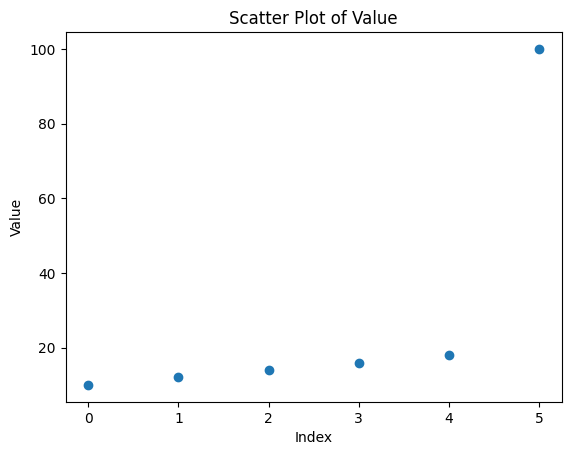

In [7]:
# ----------------------------------------------------------
# [시각화] 산점도 그리기 (Scatter Plot)
# ----------------------------------------------------------
# matplotlib은 파이썬의 대표적인 시각화 라이브러리입니다.
import pandas as pd
import matplotlib.pyplot as plt

data = {'value': [10, 12, 14, 16, 18, 100]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 산점도(점 찍기) - X축: 인덱스(순서), Y축: 값
# 값이 튀는 데이터(100)를 눈으로 쉽게 확인할 수 있습니다.
plt.scatter(df.index, df['value'])                # 인덱스 확인

plt.title('Scatter Plot of Value')  # 제목
plt.xlabel('Index') # X축 이름
plt.ylabel('Value') # Y축 이름
plt.show()                                        # 그래프 보여주기


In [8]:
# ----------------------------------------------------------
# [스케일링 1] 표준화 (Standardization, Z-Score)
# ----------------------------------------------------------
# 데이터들을 '평균이 0이고, 펴진 정도(표준편차)가 1'인 분포로 마법처럼 바꿉니다.
# 서로 단위가 다른 데이터들을 공평하게 비교할 때 씁니다.
import pandas as pd

data = {'score': [70, 80, 90, 100, 110]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

# 평균과 표준편차 구하기
mean = df['score'].mean()                         # 평균 계산
std = df['score'].std()

# 공식: (내점수 - 평균) / 표준편차
df['z_score'] = (df['score'] - mean) / std
print(df)
# 결과 해석: 0이면 딱 평균, 양수면 평균 이상, 음수면 평균 이하입니다.

   score   z_score
0     70 -1.264911
1     80 -0.632456
2     90  0.000000
3    100  0.632456
4    110  1.264911


In [10]:
# ----------------------------------------------------------
# [스케일링 2] 정규화 (Normalization, Min-Max)
# ----------------------------------------------------------
# 모든 데이터를 0과 1 사이의 값으로 압축합니다.
# 0% ~ 100% 비율로 바꾼다고 생각하면 이해하기 쉽습니다.
import pandas as pd

# 데이터 범위가 제각각인 경우
data = {'score': [1, 5, 20, 33, 66, 70, 80, 90, 100, 110]}
df = pd.DataFrame(data)                           # 데이터프레임(표) 생성

min_val = df['score'].min() # 최솟값 (가장 작은 수)
max_val = df['score'].max() # 최댓값 (가장 큰 수)

# 공식: (내점수 - 최솟값) / (최댓값 - 최솟값)
df['normalized_score'] = (df['score'] - min_val) / (max_val - min_val)
print(df)
# 결과 행석: 가장 작은 값은 0, 가장 큰 값은 1이 됩니다.

   score  normalized_score
0      1          0.000000
1      5          0.036697
2     20          0.174312
3     33          0.293578
4     66          0.596330
5     70          0.633028
6     80          0.724771
7     90          0.816514
8    100          0.908257
9    110          1.000000


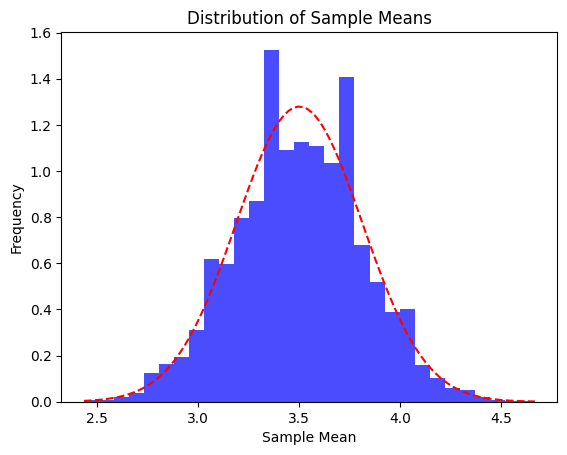

In [11]:
# ----------------------------------------------------------
# [통계 기초] 중심극한정리 맛보기
# ----------------------------------------------------------
# 주사위를 아무리 많이 던져도, 그 평균값들을 모아서 그려보면
# 신기하게도 종 모양(정규분포) 그림이 나온다는 법칙입니다.
import numpy as np
import matplotlib.pyplot as plt

n = 30         # 한번에 던질 주사위 개수 (표본 크기)
trials = 10000 # 실험 반복 횟수 (많이 할수록 종 모양이 예뻐집니다)

sample_means = []

for _ in range(trials):
    # 1. 주사위 n개를 던져서 (1~6 사이 랜덤)
    samples = np.random.randint(1, 7, n)
    # 2. 그 n개의 평균을 구해서 기록장에 적는다
    sample_means.append(np.mean(samples))

# 3. 기록된 평균값들을 히스토그램(막대그래프)으로 그리기
plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='blue', label='Sample Means')

# (참고) 이론적인 정규분포 곡선 그리기 (빨간 점선)
from scipy.stats import norm
mu = 3.5  # 주사위 눈(1~6)의 이론적 평균
sigma = np.sqrt(35/12) / np.sqrt(n) # 이론적 표준편차
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Normal Distribution')  # 선 그래프 그리기

plt.title('Central Limit Theorem (Dice Roll)')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()                                        # 그래프 보여주기
